In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("LPOINT_BIG_COMP_01_DEMO.csv", sep=',')
df2 = pd.read_csv("LPOINT_BIG_COMP_02_PDDE.csv", sep=',')
df3 = pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv', sep=',')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 파생변수 생성을 위한 데이터 셋 생성
#### Demo, 상품구매정보, 제휴사이용정보 데이터 셋에서 필요한 컬럼만 추출 후 병합 한 후 고객 별 총 구매 금액에 따라 등급을 나눔.

In [3]:
df12 = pd.merge(df1, df2, left_on = 'cust', right_on = 'cust', how = 'inner')
df123 = pd.concat([df12, df3])
df123 = df123.reset_index()
df123 = df123.drop(['index', 'ma_fem_dv', 'ages', 'zon_hlv', 'rct_no' ,'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr', 'buy_ct', 'vst_dt'], axis=1)
cust_group = df123.groupby(df123['cust']).sum()
buy_am = pd.DataFrame(cust_group['buy_am'])
bins = [10, 4000000, 20000000, 100000000, 500000000]
bins_level = ['General', 'VIP', 'MVG', 'LENITH', 'AVENUEL']
buy_am['grade'] = pd.cut(buy_am['buy_am'], bins, right = False, labels = bins_level[:-1])
cust_grade = buy_am.reset_index()
cust_grade = cust_grade.drop('buy_am', axis=1)
df2_grade = pd.merge(df2, buy_am['grade'], left_on = 'cust', right_on = 'cust', how = 'inner')
df3_grade = pd.merge(df3, buy_am['grade'], left_on = 'cust', right_on = 'cust', how = 'inner')
df23_grade = pd.concat([df2_grade, df3_grade])
df23_grade = df23_grade.reset_index()
df23_grade = df23_grade.drop(['index', 'rct_no', 'vst_dt', 'buy_ct', 'pd_c'], axis=1)
df23_grade

,cust,chnl_dv,cop_c,br_c,de_dt,de_hr,buy_am,grade
0,M430112881,1,A01,A010039,20210101,10,15000.0,General
1,M430112881,1,A01,A010039,20210101,10,19000.0,General
2,M430112881,1,A01,A010039,20210101,10,19000.0,General
3,M430112881,1,A01,A010039,20210101,10,19000.0,General
4,M430112881,1,A01,A010039,20210101,10,9900.0,General
...,...,...,...,...,...,...,...,...
4630042,M321652667,1,D01,D010143,20210924,13,16400.0,General
4630043,M321652667,1,D02,D020245,20211018,12,9100.0,General
4630044,M736929241,2,C01,C010011,20210914,22,26000.0,General
4630045,M040608978,1,C02,C020002,20211029,16,27500.0,General


In [4]:
amount = pd.DataFrame(df23_grade.groupby('cust')['buy_am'].sum())

In [6]:
pd.merge(cust_grade, amount, on='cust', how='inner')

,cust,grade,buy_am
0,M000034966,General,658020.0
1,M000059535,General,46000.0
2,M000136117,MVG,27611030.0
3,M000201112,General,53120.0
4,M000225114,General,2253900.0
...,...,...,...
29751,M999708287,General,60000.0
29752,M999770689,General,1422890.0
29753,M999849895,General,1118792.0
29754,M999926092,General,129500.0


C:\Users\user\AppData\Local\Temp/ipykernel_2148/3058963325.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


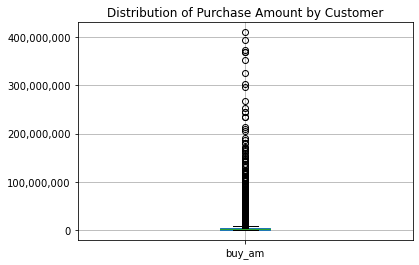

In [7]:
amount.boxplot()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.title('Distribution of Purchase Amount by Customer')
plt.show()

In [12]:
cust_grade.groupby('grade').count()

,cust
grade,
General,23849
VIP,5091
MVG,749
LENITH,67
